W ramach kursu będziemy wykorzystywać głównie bibliotekę OpenCV (Open Computer Vision Library).
W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi funkcjonalnościami: wczytaniami, zapisywaniem, konwersją do inne przestrzeni barw.
Zaznajomimy się również z Jupyter Notebook.

--2020-10-13 16:49:04--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/00_Test/mandril.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77244 (75K) [image/jpeg]
Saving to: ‘mandril.jpg’

mandril.jpg         100%[===================>]  75.43K  --.-KB/s    in 0.03s   

2020-10-13 16:49:04 (2.50 MB/s) - ‘mandril.jpg’ saved [77244/77244]



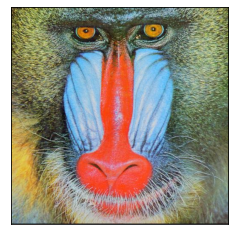

In [ ]:
import cv2
import os
from matplotlib import pyplot as plt

# Pobranie grafiki
if not os.path.exists("mandril.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/00_Test/mandril.jpg

# Wczytywanie grafiki
I = cv2.imread('mandril.jpg')

# Trzeba skonwertowac kolor z BGR do RGB
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Wyswietlenie grafiki
plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()

Image filtering:


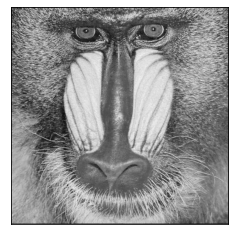

In [ ]:
import cv2
import os
from matplotlib import pyplot as plt

if not os.path.exists("mandril.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/00_Test/mandril.jpg

I = cv2.imread('mandril.jpg')

# Flitrowanie grafiki (Do gray)
I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()

Czasami konieczne jest zapisanie przetworzonego obrazu.
Służy do tego funkcja `cv2.imwrite`.
Proszę zapisać szarą wersję mandryla w formacie *png*.
Warto sprawdzić, czy obraz zapisał się poprawnie tj. otworzyć go w aplikacji do przeglądania obrazów.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


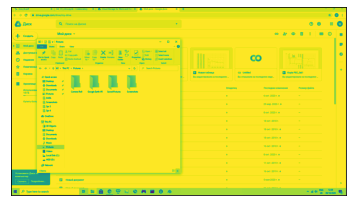

True

In [ ]:
# POBRANIE I WYSWIETLANIE GRAFIKI Z GOOGLE DRIVE

import cv2
import os
from matplotlib import pyplot as plt 

# Montujemy drive
from google.colab import drive
drive.mount('/content/gdrive')



if not os.path.exists("mandril.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/00_Test/mandril.jpg

# Wczytywanie grafiki z Google Drive
I = cv2.imread(os.path.join("/content/gdrive/My Drive/",'test.png'))



I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()



# Export grafiki do Google Drive
cv2.imwrite(os.path.join("/content/gdrive/My Drive/",'gray.jpg'), I)

Obraz w skali szarości możemy traktować jako dwuwymiarową funkcję $L(x,y)$, gdzie $x$, $y$ to współrzędne piksela, a $L(x,y)$ poziom jasności (najczęściej [0;255] - zapis na 8-bitach, typ *unsigned int*).
Wyświetl obraz mandryl jako funkcję dwuwymiarową (uwaga - to chwilę się liczy):


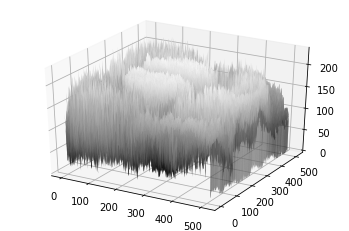

In [ ]:
# 3D projekcja obrazku

import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

if not os.path.exists("mandril.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/00_Test/mandril.jpg

I = cv2.imread('mandril.jpg')
I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

# Osi siatki punktow o rozmiarach jak obraz (shape)
xx, yy = np.mgrid[0:I.shape[0], 0:I.shape[1]]

# Umieszczamy figure
fig = plt.figure()
ax = fig.gca(projection='3d')

# Rusyjmey wedlug naszych osi
ax.plot_surface(xx, yy, I ,rstride=1, cstride=1, cmap=plt.get_cmap('gray'),
        linewidth=0)

plt.show()

Komentarz:
- używamy biblioteki do obliczeń *numpy*,
- tworzymy siatkę punktów o rozmiarach takich jak obraz (*shape*),
- rysujemy wykres 3D


Podczas przetwarzania i analizy obrazów przydatne bywają "przekroje" przez obraz, czyli wartości funkcji $L(x,y)$ w przypadku gdy $x$ lub $y$ jest ustalone.
Wykonaj jeden wybrany przekrój w $x$ i $y$:
- po pierwsze należy pobrać dany wiersz lub kolumnę - np. `S = IG[10,:]` (tu jedenasty wiersz),
- po drugie stworzyć wykres złożony z dwóch subwykresów: `f, (ax1,ax2) = plt.subplots(1,2)`
- dla każdego z nich ustawić tytuł (np. `ax1.set_title('XXX')`) oraz treść `ax1.plot(S)`,
- na koniec całość wyświetlić `plt.show()`.






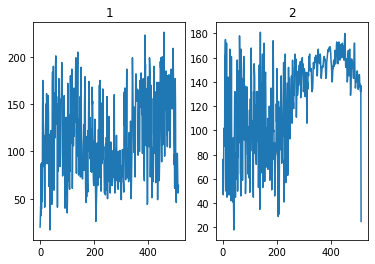

In [ ]:
# "Przekroje" obrazu

import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

if not os.path.exists("mandril.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/00_Test/mandril.jpg

I = cv2.imread('mandril.jpg')
I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

# Pobieramy 11 wierz/kolimne z obrazku:
S1 = I[10,:]
S2 = I[:,10]

# Tworzymy wykres stworzony z dwoch
f, (ax1,ax2) = plt.subplots(1,2)


#Title
ax1.set_title('1')
ax2.set_title('2')


# Rysujemy przekroje
ax1.plot(S1)
ax2.plot(S2)


#Wyswietlamy
plt.show()

Obrazy indeksowane składają się z dwóch macierzy - obrazu oraz tzw. mapy kolorów. 
W macierzy obrazu zapisane są wartości poszczególnych pikseli. 
Macierz mapy kolorów ma rozmiar $m \times 3$ ($m$ wierszy, w~każdym 3 wartości - składowe R,G,B).
Podczas wyświetlania, na podstawie wartości piksela, odczytywany jest kolor z macierzy mapy kolorów.
W ten sposób możliwe staje się "pokolorowanie" obrazu w skali szarości (stąd wcześniej szary mandryl był kolorowy).
Wykorzystanie pseudokoloru nie wpływa na ilość informacji zawartej na obrazku, pomaga jedynie przedstawić go w bardziej czytelnej (dla człowieka) formie.
Przykładowo można uzyskać poprawę kontrastu, co jest ważne przy analizie np. obrazów medycznych.
Bardziej obszerny opis i spis dostępnym map można znaleźć w [dokumentacji.](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

Wykorzystując dokumentację oraz polecenie `plt.imshow(IG, cmap=plt.get_cmap('XXX'))` proszę wyświetlić obraz madryl w 4 różnych mapach kolorów.


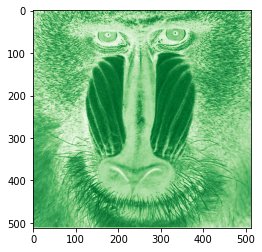

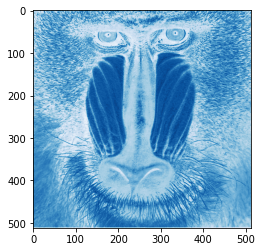

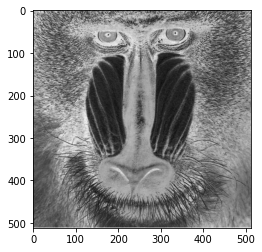

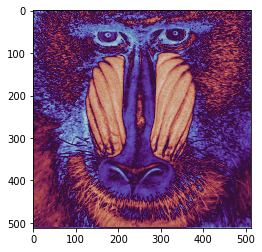

In [ ]:
import cv2
import os
from matplotlib import pyplot as plt

if not os.path.exists("mandril.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/00_Test/mandril.jpg

I = cv2.imread('mandril.jpg')
I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)


plt.imshow(I, cmap=plt.get_cmap('Greens'))
plt.show()

plt.imshow(I, cmap=plt.get_cmap('Blues'))
plt.show()

plt.imshow(I, cmap=plt.get_cmap('binary'))
plt.show()

plt.imshow(I, cmap=plt.get_cmap('twilight'))
plt.show()